#Extroverted vs. Introverted in College
##Summer 2025 CMSC320 Final Project
####Names: Briana Duffy, Yonatan Tussa, Mirza Kir, Minjae Sohn
---
Contributions:

A: Project idea - Briana, Minjae, Mirza, Yonatan\
B: Dataset Curation and Preprocessing - Minjae\
C: Data Exploration and Summary Statistics - Briana, Minjae, Mirza\
D: ML Algorithm Design/Development - Minjae, Yonatan, Briana\
E: ML Algorithm Training and Test Data Analysis - Minjae, Briana, Mirza\
F: Visualization, Result Analysis, Conclusion - Minjae, Mirza, Yonatan\
G: Final Tutorial Report Creation - Yonatan, Minjae\
H: Additional (not listed above)

#Introduction
This project investigates the relationship between students' social behaviors (number of friends, hours spent on social media, extracurricular involvment, etc.) and their academic performance. We ask:

* Do extroverts tend to perform better in school?
* Is social media or Netflix use associated with worse academic performance?
* Are there relationships between social behavior and GPA/test scores?

Answering these questions and understanding any connections can help guide student wellness, outreach programs, and advising.

#Data Collection
In the beginning state of the Data Science life cycle, we are looking for datasets that will help us answer our questions. We decided to use a famous database called "Kaggle" and found 3 separate datasets that are relevant to our topic.
* [Extrovert vs. Introvert Behavior Data](https://www.kaggle.com/datasets/rakeshkapilavai/extrovert-vs-introvert-behavior-data)
* [Student Habits vs. Academic Performance](https://www.kaggle.com/datasets/jayaantanaath/student-habits-vs-academic-performance)
* [Pschosocial Dimensions of Student Life](https://www.kaggle.com/datasets/mdismielhossenabir/psychosocial-dimensions-of-student-life)

In order to download the dataset, you want to press the "Download" button located top right of the page, and press "Download dataset as zip" When you do, you will be able to access the datasets as a CSV file, which will be helpful when we have to read the dataset as a dataframe.
\
\
In this project, we will be coding in Python and using tools such as Jupyter Notebook or Google Colab. Either tool works for our demonstration. We will also be using a lot of different libraries. We will mention which libaries you need to import before we use them.
\
One main library you do want to familiarize yourself with is Pandas. Pandas is an easy way for us to manipulate data within Pyhton. If you want to learn more about Pandas, check this [link](https://pandas.pydata.org/docs/index.html) out.

In [26]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from scipy.stats import ttest_ind
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

#Data Preprocessing
Let's begin with making sure our data is accessible within Python. Let's first read in the CSV files.

In [2]:
intro_vs_extro_df = pd.read_csv('introvert_vs_extrovert.csv')
student_habit_df = pd.read_csv('student_habits_performance.csv')
student_performance_df = pd.read_csv('CSE_student_performances.csv')

df is a shorthand for dataframes. You can simply imagine dataframes as computer's way of working with excel sheets. After we read the CSV files, we need to make sure everything is parsed properly.

In [3]:
# Parsing
intro_vs_extro_df['Stage_fear'] = intro_vs_extro_df['Stage_fear'].astype('string')
intro_vs_extro_df['Drained_after_socializing'] = intro_vs_extro_df['Drained_after_socializing'].astype('string')
intro_vs_extro_df['Personality'] = intro_vs_extro_df['Personality'].astype('string')
student_habit_df['gender'] = student_habit_df['gender'].astype('string')
student_habit_df['part_time_job'] = student_habit_df['part_time_job'].astype('string')
student_habit_df['diet_quality'] = student_habit_df['diet_quality'].astype('string')
student_habit_df['parental_education_level'] = student_habit_df['parental_education_level'].astype('string')
student_habit_df['internet_quality'] = student_habit_df['internet_quality'].astype('string')
student_habit_df['extracurricular_participation'] = student_habit_df['extracurricular_participation'].astype('string')
student_performance_df['Gender'] = student_performance_df['Gender'].astype('string')
student_performance_df['AcademicPerformance'] = student_performance_df['AcademicPerformance'].astype('string')
student_performance_df['TakingNoteInClass'] = student_performance_df['TakingNoteInClass'].astype('string')
student_performance_df['DepressionStatus'] = student_performance_df['DepressionStatus'].astype('string')
student_performance_df['FaceChallangesToCompleteAcademicTask'] = student_performance_df['FaceChallangesToCompleteAcademicTask'].astype('string')
student_performance_df['LikePresentation'] = student_performance_df['LikePresentation'].astype('string')
student_performance_df['LikeNewThings'] = student_performance_df['LikeNewThings'].astype('string')

This is to make sure that some columns with words as their data rather than numbers is a type string for us to manipulate the data easier.

**If you want to see the dataframes**

In [4]:
display(intro_vs_extro_df)
display(student_habit_df)
display(student_performance_df)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,3.0,Yes,2.0,0.0,Introvert


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7


,Age,Gender,AcademicPerformance,TakingNoteInClass,DepressionStatus,FaceChallangesToCompleteAcademicTask,LikePresentation,SleepPerDayHours,NumberOfFriend,LikeNewThings
0,23,Male,Average,No,Sometimes,Yes,Yes,12,NaN,Yes
1,23,Male,Excellent,Sometimes,Yes,No,Yes,8,80.0,Yes
2,24,Male,Average,No,Sometimes,Sometimes,No,8,10.0,Yes
3,20,Female,Good,Yes,Sometimes,Yes,No,5,15.0,Yes
4,24,Female,Average,Yes,Yes,Yes,Yes,5,2.0,Yes
...,...,...,...,...,...,...,...,...,...,...
94,21,Male,Good,Yes,Sometimes,Yes,Yes,6,4.0,Yes
95,21,Female,Good,Yes,Yes,No,Yes,6,6.0,Yes
96,25,Male,Good,Yes,Sometimes,No,Yes,4,9.0,No
97,21,Male,Good,Yes,No,Sometimes,No,10,23.0,Yes


#Exploratory Data Analysis
Now that we have our dataframes, let's move onto doing some math to see some signficant relationships.\
\
Key steps:
* Computed conditional probabilities using Bayes' Theorem
* Investigated Spearman correlations between friend count and GPA
* Conducted hypothesis testing for associates between media use and exam performance



##Bayes Theorem and Conditional Probability Analysis

In [5]:
# Finding the probability that a person is an extrovert given that they have a circle of 5 or more friends and that they
# are involved in 2 or more hours of social event activity a week. We hypothesize that these probabilities should be high ans
# would be a good indicator of extroversion. This can be used to supplement the below assumptions.
df = intro_vs_extro_df.copy()

extrovert = df['Personality'].str.lower() == 'extrovert'
social = df['Social_event_attendance'] > 2
friends = df['Friends_circle_size'] >= 5

social_sum = social.sum()
extrovert_and_social = df[social & extrovert].shape[0]

friends_sum = friends.sum()
extrovert_and_friends = df[friends & extrovert].shape[0]

probability_social = extrovert_and_social / social_sum
probability_friends = extrovert_and_friends / social_sum

print(f"Conditional probability that a person is an extrovert given they have 5 or more friends: {probability_friends:.3f}")
print(f"Conditional probability that a person is an extrovert given they attend 3 or more hours of social events a week: {probability_social:.3f}")

Conditional probability that a person is an extrovert given they have 5 or more friends: 0.760
Conditional probability that a person is an extrovert given they attend 3 or more hours of social events a week: 0.774


In [6]:
# Finding the probability that a student has Good or Excellent (ie, above average) academic performance given that they have 5 or more friends.
# The hypothesis favors extroverts, as we hypothesize that a higher number of friends, or a larger social support network, increases academic
# performance
df = student_performance_df.copy()

df["NumberOfFriend"] = pd.to_numeric(df["NumberOfFriend"], errors="coerce")
df = df.dropna(subset=["NumberOfFriend"])

more_than_5_friends = df['NumberOfFriend'] >= 5
good_or_excellent = df['AcademicPerformance'].isin(['Good', 'Excellent'])

friends_sum = more_than_5_friends.sum()
academic_good_with_friends = df[more_than_5_friends & good_or_excellent].shape[0]

probability = academic_good_with_friends / friends_sum

print(f"Conditional probability that a student has above average academic performance given they have 5 or more friends: {probability:.3f}")

Conditional probability that a student has above average academic performance given they have 5 or more friends: 0.623


In [7]:
# Finding the probability that a student has a passing exam score given involvement in extracurricular activities
# and given daily social media hours over 2. We hypothesize that these assumptions are unlikely, and that conversely, high
# social media and possibly extracurricular involvement, which may indicate extroversion, can indicate poor academic performance.
df = student_habit_df.copy()

extracurricular = df['extracurricular_participation'].str.lower() == 'yes'
sm_2hr = df['social_media_hours'] >= 2
score_70 = df['exam_score'] >= 70

extra_sum = extracurricular.sum()
score_70_with_extra = df[extracurricular & score_70].shape[0]
extra_prob = score_70_with_extra / extra_sum

sm_2hr_sum = sm_2hr.sum()
score_70_with_sm2hr = df[sm_2hr & score_70].shape[0]
sm_prob = score_70_with_sm2hr / sm_2hr_sum

print(f"Conditional probability that a student passed the exam given they have extracurricular involvement: {extra_prob:.3f}")
print(f"Conditional probability that a student passed the exam given they have 2+ social media hours daily: {sm_prob:.3f}")

Conditional probability that a student passed the exam given they have extracurricular involvement: 0.516
Conditional probability that a student passed the exam given they have 2+ social media hours daily: 0.471


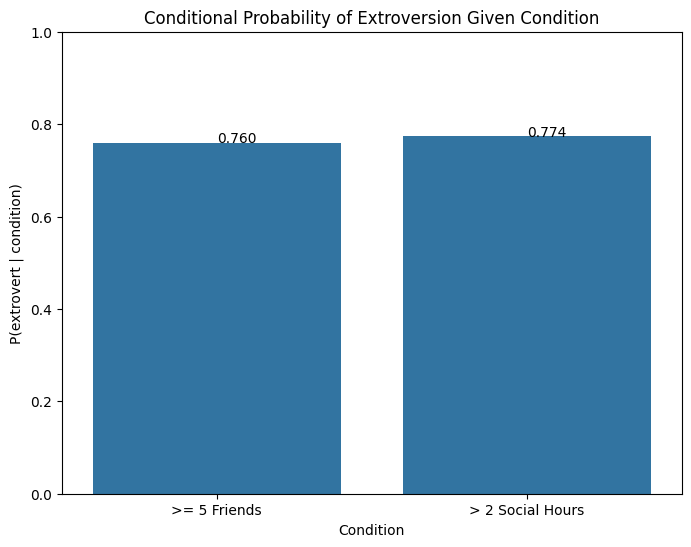

In [8]:
# Plot
plt.figure(figsize=(8, 6))
labels = ['>= 5 Friends', '> 2 Social Hours']
ps = [probability_friends, probability_social]

sns.barplot(x=labels, y=ps)
plt.title("Conditional Probability of Extroversion Given Condition")
plt.xlabel("Condition")
plt.ylabel("P(extrovert | condition)")

for i in range(len(ps)):
  plt.text(i, ps[i], "{:.3f}".format(ps[i]))

plt.ylim(0, 1)
plt.show()

So what was our conclusion from this analysis?
* P(extrovert | ≥ 5 friends) = .76 and P(extrovert | > 2 social hours) = .774. These probabilities are relatively high and support our hypothesis that they these two metrics are good indicators of extroverts.

* P((Good ∪ Excellent) | ≥ 5 Friends) = .623. We cannot really draw a definitive conclusion from this value. However, it suggests a mild correlation between above average academic performance given 5 or more friends.

* P(passed exam | extracurricular involvement) = .516 and P(passed exam | ≥ 2 hours on social media). Our initial hypothesis seems to have been incorrect. Since both probabilities are near the 50% mark, it cannot be said that extracurricular involvement and social media usage are strong markers of
negative academic performance.

##Spearman Correlation


In [9]:
a_df = student_performance_df.copy()

ordinal = {'below average':1, 'average':2, 'good':3, 'excellent':4}
a_df['Score'] = a_df['AcademicPerformance'].str.strip().str.lower().map(ordinal)

a_df['NumberOfFriend'] = pd.to_numeric(a_df['NumberOfFriend'], errors='coerce')

a_filter = a_df[['NumberOfFriend', 'Score']].dropna()

rho, p = stats.spearmanr(a_filter['NumberOfFriend'], a_filter['Score'])
print(f"Spearman's rho: {rho:.3f}, p-value: {p:.4f}")

Spearman's rho: 0.282, p-value: 0.0056


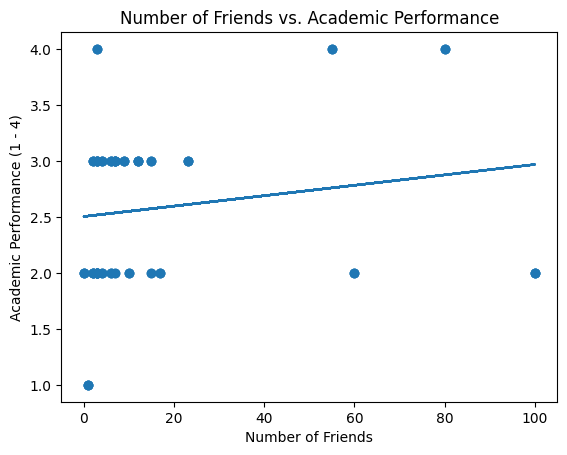

In [10]:
scatter_df = a_df[['NumberOfFriend', 'Score']].dropna()

plt.figure()
plt.scatter(scatter_df['NumberOfFriend'], scatter_df['Score'])
slope, intercept = np.polyfit(scatter_df['NumberOfFriend'], scatter_df['Score'], 1)
plt.plot(scatter_df['NumberOfFriend'], slope * scatter_df['NumberOfFriend'] + intercept)
plt.xlabel('Number of Friends')
plt.ylabel('Academic Performance (1 - 4)')
plt.title('Number of Friends vs. Academic Performance')
plt.show()

Conclusion from Spearman Correlation (rho = 0.282, p = 0.0056)\
\
We see that there is a small positive association between the number of friends a student reported and their academic performance. Since the p-value is smaller than 0.01, we can safely conclude that this relationship is significant. Our conclusion being: students with larger friend networks, on average, tend
to achieve slightly higher performance ratings. However, the effect is little in practice. Squaring the rho tells us that number of friends expalins only about 8% of the variation in the exam scores. The other 92% is determined by other factors. While correlation between the two exists, correlation does not mean causation.

##Hypothesis t-test and Spearman's

In [11]:
t_df = student_habit_df.copy()

for col in ['exam_score', 'social_media_hours', 'netflix_hours']:
  t_df[col] = pd.to_numeric(t_df[col], errors='coerce')

t_df = t_df.dropna(subset=['exam_score', 'social_media_hours', 'netflix_hours'])

rho_sm, p_sm = stats.spearmanr(t_df['social_media_hours'], t_df['exam_score'])
rho_nf, p_nf = stats.spearmanr(t_df['netflix_hours'], t_df['exam_score'])

print("Spearman Correlations")
print(f"Social Media Hours: rho = {rho_sm:.3f}, p = {p_sm:.10f}")
print(f"Netflix Hours: rho = {rho_nf:.3f}, p = {p_nf:.10f}")

yes_group = t_df[t_df['extracurricular_participation'] == 'Yes']['exam_score'].dropna()
no_group = t_df[t_df['extracurricular_participation'] == 'No']['exam_score'].dropna()

t_stat, p_val = stats.ttest_ind(yes_group, no_group, equal_var=False)

print("\nHypothesis t-test")
print(f"Mean for Yes: {yes_group.mean():.2f}, n = {len(yes_group)}")
print(f"Mean for No: {no_group.mean():.2f}, n = {len(no_group)}")
print(f"T-statistic: {t_stat:.2f}, p-value: {p_val:.4f}")

Spearman Correlations
Social Media Hours: rho = -0.166, p = 0.0000001238
Netflix Hours: rho = -0.165, p = 0.0000001492

Hypothesis t-test
Mean for Yes: 69.62, n = 318
Mean for No: 69.59, n = 682
T-statistic: 0.03, p-value: 0.9781


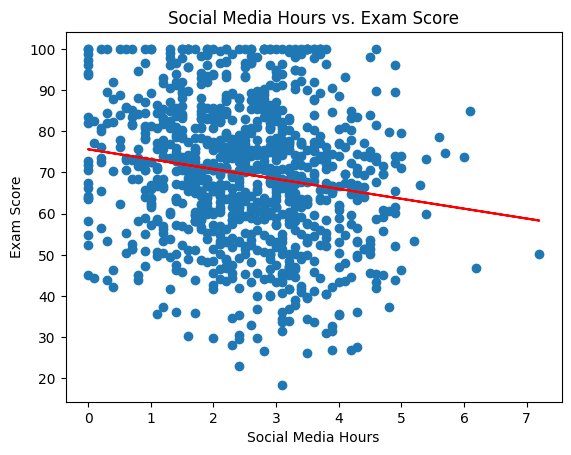

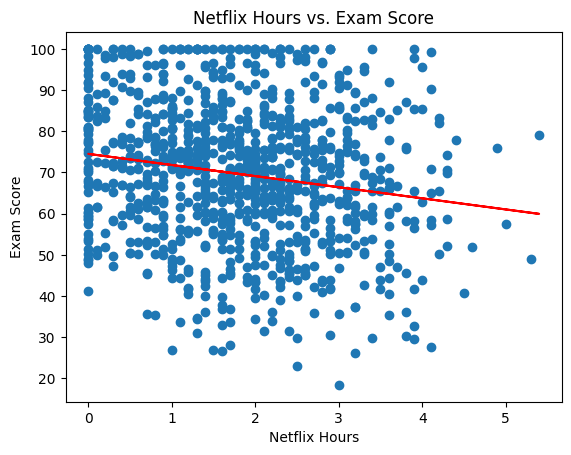

In [12]:
plt.figure()
plt.scatter(t_df['social_media_hours'], t_df['exam_score'])
slope, intercept = np.polyfit(t_df['social_media_hours'], t_df['exam_score'], 1)
plt.plot(t_df['social_media_hours'], slope * t_df['social_media_hours'] + intercept, color='red')
plt.xlabel('Social Media Hours')
plt.ylabel('Exam Score')
plt.title('Social Media Hours vs. Exam Score')
plt.show()
plt.figure()
plt.scatter(t_df['netflix_hours'], t_df['exam_score'])
slope, intercept = np.polyfit(t_df['netflix_hours'], t_df['exam_score'], 1)
plt.plot(t_df['netflix_hours'], slope * t_df['netflix_hours'] + intercept, color='red')
plt.xlabel('Netflix Hours')
plt.ylabel('Exam Score')
plt.title('Netflix Hours vs. Exam Score')
plt.show()

<Figure size 640x480 with 0 Axes>

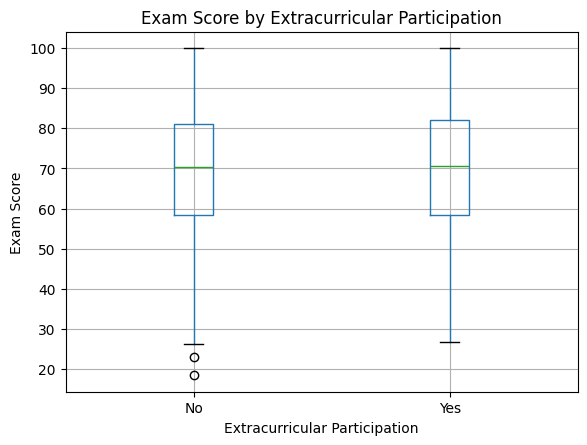

In [13]:
plt.figure()
t_df[['extracurricular_participation', 'exam_score']].boxplot(column='exam_score', by='extracurricular_participation')
plt.xlabel('Extracurricular Participation')
plt.ylabel('Exam Score')
plt.title('Exam Score by Extracurricular Participation')
plt.suptitle('')
plt.show()

Conclusion:\
**Social Media and Netflix Time spent vs. Exam Scores**\
For both social media and netflix time spent vs. exam scores, we see a small negative correlation with rho approximately being -0.17. Although the low p-value indicate that the correlation is significant, squaring the rho explains the proportion of the variance which is about 3%. Meaning 97% of the scorevariation is due to other factors.
\
\
**Extracurricular Participation vs. Exam Scores**\
The t-test finds no difference at all between whether students do or don't join extracurriculars with their exam scores.

#Primary Analysis
We framed the problem as a classification task. Can we predict whether a student performs well on their exam or poorly based on their social metrics?

Approach:
* Binary classification using Logistic Regression
* Input features: social hours, media use, extracurricular involvement
* Evaluated using accuracy precision, recall

In [28]:
mdf = student_habit_df.copy()

mdf = mdf[['social_media_hours', 'netflix_hours', 'extracurricular_participation', 'exam_score']].dropna()

#defining binary target: 1 if exam_score is greater than equal to 70 (good performance), 0 otherwise
mdf['target'] = (mdf['exam_score'] >= 70).astype(int)

#encoding extracurricular participation: Yes = 1, No = 0
mdf['extracurricular_encoded'] = mdf['extracurricular_participation'].str.strip().str.lower().map({'yes': 1, 'no': 0})

X = mdf[['social_media_hours', 'netflix_hours', 'extracurricular_encoded']]
y = mdf['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Logistic Regression Performance:")
print(f"Accuracy:  {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Poor', 'Good']))

Logistic Regression Performance:
Accuracy:  0.555
Precision: 0.577
Recall:    0.571

Classification Report:
              precision    recall  f1-score   support

        Poor       0.53      0.54      0.53        95
        Good       0.58      0.57      0.57       105

    accuracy                           0.56       200
   macro avg       0.55      0.55      0.55       200
weighted avg       0.56      0.56      0.56       200



**What can we conclude from this?**
\
\
The model's accurary of about 56% is only slightly above a random guess, which is 50%. The precision and the recall for the 'good' class is around 57%, which tells us it's okay at best at identifying high performers.\
\
Such numbers tell us that hours spent on social media and Netflix, and whether a student participates in extracurriculars, capture only a small part of the variance in exam outcomes. There are many other factors, such as study time and class attendance which may have more impact.\
\
Overall, the social habits do not provide a strong basis for predicting exam performance.



#Visualizations
Let's try to make a plot that can visualize the primary analysis we just conducted

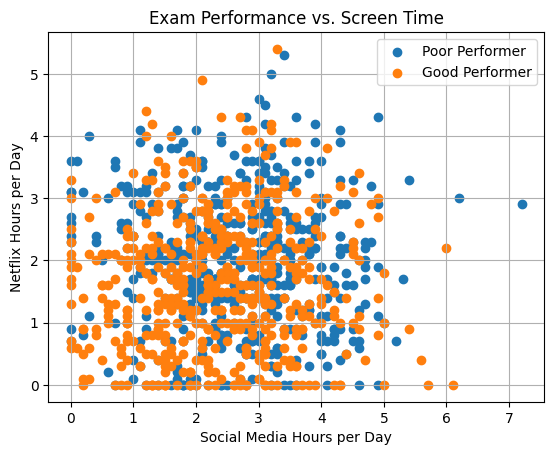

In [30]:
plt.figure()
for label, group in df.groupby('target'):
    name = 'Good Performer' if label == 1 else 'Poor Performer'
    plt.scatter(group['social_media_hours'], group['netflix_hours'], label=name)
plt.xlabel('Social Media Hours per Day')
plt.ylabel('Netflix Hours per Day')
plt.title('Exam Performance vs. Screen Time')
plt.legend()
plt.grid(True)
plt.show()

**Some Key Details**

* Both good and poor performers span similar ranges of social media hours and Netflix hours. There is no clear region where one class dominates the other.
* There doesn't exist a straight line that can split the two classes.
* Good performers may cluster toward the lower end of the hours, but there are poor performers there as well.

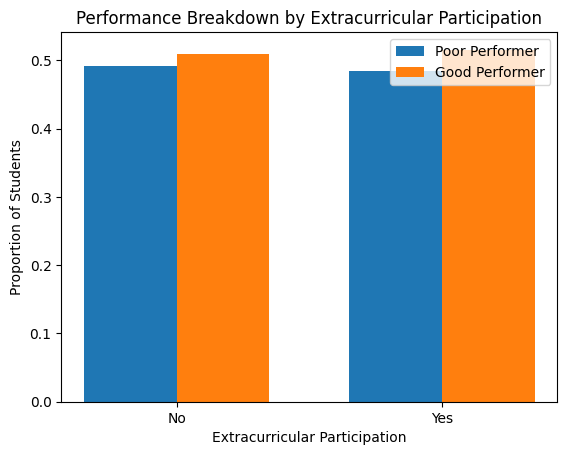

In [34]:
summary = mdf.groupby('extracurricular_participation')['target'].value_counts(normalize = True).unstack().fillna(0)
categories = summary.index.tolist()
good_props = summary[1].tolist()
poor_props = summary[0].tolist()

x = range(len(categories))
width = 0.35

plt.figure()
plt.bar([xi - width/2 for xi in x], poor_props, width, label='Poor Performer')
plt.bar([xi + width/2 for xi in x], good_props, width, label='Good Performer')
plt.xlabel('Extracurricular Participation')
plt.ylabel('Proportion of Students')
plt.title('Performance Breakdown by Extracurricular Participation')
plt.xticks(x, categories)
plt.legend()
plt.show()

In case you thought extracurricular participation had some signficant impact, we can clearly see that good performers and poor performers are split almost evenly whether they participate in an extracurricular activity or not.

#Insights and Conclusion
Our project clearly shows that being introverted or extroverted does not affect exam scores/academic performance. We set out to see if different personality affected college performance, and we see that it does not. While there are many other factors we must consider, with the simple classification study, we can feel pretty good about our conclusion.\
\
Uninformed readers were able to see the process Data Scientists go through to ask and answer questions. You saw what questions were asked, how they were approached, what the results showed, and how we built to get such results.\
\
If you are familiar with basic classification studies, you would have recognized the train/test splits, binary encoding, model evaluation with precision/recall and why we did things the way we did. You could've seen that quantitative data, such as a simple 'Yes' or 'No', does poorly in such studies. You may have also learned some new plotting techniques.\
\
Overall, our project set out to examine the academic performance of introverts and extroverts while educating both novice and expert data scientists.